Run this initial code block

In [7]:
import pandas as pd
import boto3


boto3 setup:

In [8]:
s3 = boto3.resource('s3')

s3_obj = s3.Bucket("spotify-song-recommender-data").Object('light_spotify_dataset.csv').get()

song_data = pd.read_csv(s3_obj['Body'])

song_data.describe()
# song_data.head()


,variance,Release Date,Tempo,Loudness,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
count,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000
mean,0.658932,2008.472826,120.609685,-8.038657,40.003705,62.369166,59.127492,47.656966,11.748042,19.905333,26.156194,5.440052
std,0.320735,14.756158,28.966358,3.842215,18.770245,22.083376,17.069117,23.801800,12.443653,16.551294,29.047331,17.662526
min,-1.000000,1900.000000,33.000000,-46.770000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,0.833514,2002.000000,97.000000,-9.890000,27.000000,48.000000,48.000000,29.000000,4.000000,10.000000,2.000000,0.000000
50%,0.833514,2015.000000,120.000000,-7.190000,39.000000,64.000000,60.000000,47.000000,6.000000,13.000000,14.000000,0.000000
75%,0.833514,2019.000000,140.000000,-5.370000,52.000000,80.000000,72.000000,66.000000,16.000000,25.000000,44.000000,0.000000
max,1.000000,2024.000000,200.000000,3.740000,100.000000,100.000000,99.000000,99.000000,97.000000,100.000000,100.000000,100.000000


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()

3.10.1


In [10]:
features = ['Tempo', 'Loudness', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Acousticness', 'Instrumentalness']
X = song_data[features]
X_scaled = scaler.fit_transform(X)

Applying K Means Clustering

In [19]:
kmeans = KMeans(n_clusters=5, random_state=1)

In [21]:
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=1)

In [22]:
song_data['kmean_10'] = kmeans.labels_

In [23]:
song_data

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,kmean_10
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0,3
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0,4
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2,1
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0,1
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236983,(Eri Sasaki),Gate Of Steiner,sadness,0.833514,"Unknown,Unknown,Unknown",2018,D min,148,-6.44,No,41,61,41,37,4,14,20,0,3
236984,(Elena Tsagrinou),El Diablo,love,0.833514,"Unknown,Unknown,Unknown",2021,A min,114,-7.78,No,51,66,66,62,13,84,0,0,1
236985,(Dima Bilan),Believe,joy,0.833514,"Unknown,Unknown,Unknown",2009,C min,134,-6.72,No,36,73,55,24,5,22,5,0,3
236986,(Ani Lorak),Shady Lady,joy,0.833514,"Unknown,Unknown,Unknown",2009,F# min,128,-13.00,No,37,70,71,77,5,7,5,0,1


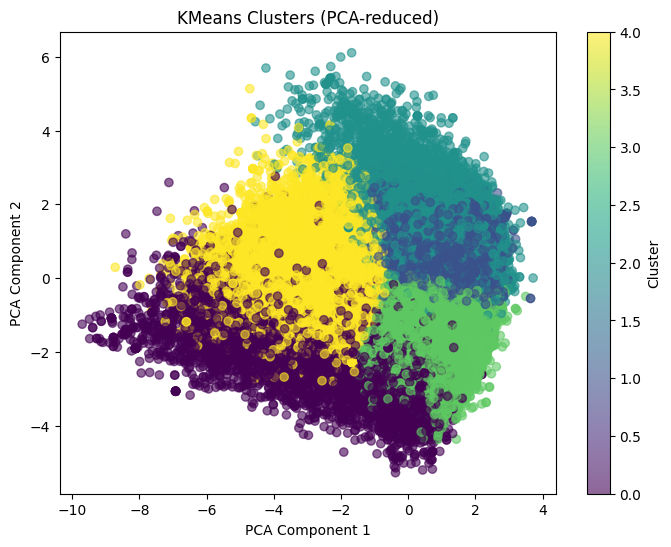

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=song_data['kmean_10'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (PCA-reduced)')
plt.colorbar(scatter, label='Cluster')
plt.show()